# Introduction to Portfolio Theory: Prices vs Returns #

Nancy is a fifth-semester economics student trying to know more about capital markets. For this quest, she decided to invest some dollars in the stock market to create some returns over time. Her best friend, Thomas, told her that NVidia and Amazon both were good ideas for a first investment, but she has a limited budget, so she can only pick one. What would you do in Nancy's shoes?

In [5]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Statistics
from scipy.stats import probplot
from scipy.stats import skew, kurtosis
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import jarque_bera
from scipy.stats import anderson

# Visualization
import matplotlib.pyplot as plt

# Import Data
import yfinance as yf

In [8]:
# Define a function to import data from the stocks files
def import_daily_financial_data(
    ticker: str,
    start_date: str = '2018-01-01',
    end_date: str = '2025-01-01',
):

    # Get the Data from Yahoo Finance
    data = yf.download(
        ticker,                 # Stock to import
        start=start_date,       # First Date
        end=end_date,           # Last Date
        interval='1d',          # Daily Basis
        auto_adjust=True        # Adjusted Prices
    )
    
    # Flat columns
    data.columns = data.columns.get_level_values(0)
    
    # get rid of nans
    data.dropna(inplace=True)

    return data

In [9]:
# Amazon Data
df_amzn = import_daily_financial_data("AMZN")

df_amzn

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,59.450500,59.500000,58.525501,58.599998,53890000
2018-01-03,60.209999,60.274502,59.415001,59.415001,62176000
2018-01-04,60.479500,60.793499,60.233002,60.250000,60442000
2018-01-05,61.457001,61.457001,60.500000,60.875500,70894000
2018-01-08,62.343498,62.653999,61.601501,61.799999,85590000
...,...,...,...,...,...
2024-12-24,229.050003,229.139999,226.130005,226.940002,15007500
2024-12-26,227.050003,228.500000,226.669998,228.500000,16146700
2024-12-27,223.750000,226.029999,220.899994,225.600006,27367100


In [10]:
# Amazon Data
df_nvda = import_daily_financial_data("NVDA")

df_nvda

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,4.929429,4.933138,4.809500,4.841151,355616000
2018-01-03,5.253853,5.284268,5.038229,5.046884,914704000
2018-01-04,5.281547,5.391832,5.259292,5.335206,583268000
2018-01-05,5.326305,5.363644,5.219482,5.296385,580124000
2018-01-08,5.489505,5.563687,5.404937,5.449941,881216000
...,...,...,...,...,...
2024-12-24,140.207108,141.886946,138.637245,139.987127,105157000
2024-12-26,139.917130,140.837058,137.717335,139.687155,116205600
2024-12-27,136.997391,139.007216,134.697615,138.537258,170582600


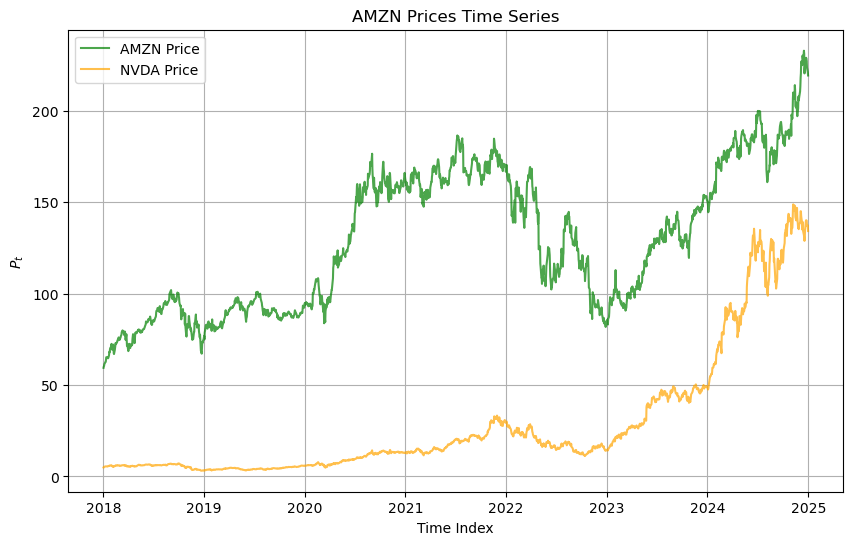

In [11]:
# Time Series Graphs for Adjusted Close Prices

plt.figure(figsize=(10, 6))
plt.plot(df_amzn['Close'], label='AMZN Price', color='green', alpha=0.7)
plt.plot(df_nvda['Close'], label='NVDA Price', color='orange', alpha=0.7)

# Config
plt.title('AMZN Prices Time Series')
plt.xlabel('Time Index')
plt.ylabel('$P_t$')
plt.legend()

# Show
plt.grid(True)
plt.show()

By watching this graph, Nancy might conclude Amazon was the best investment because its price was always higher than Nvidia's. But that is a common bias many people fall into. The reality is that we do not have to check price lines, but the slopes of these. That is why we use returns: the change (in percentage) of prices over time.

The following chart shows the comparison between both stocks' cumulative returns. Hence, we can conclude that, by holding an Nvidia stock from 2018 to the end of 2024, she would have more than quintupled her money. In Amazon's case, by holding a stock during the same time, Nancy would have less than tripled her money.

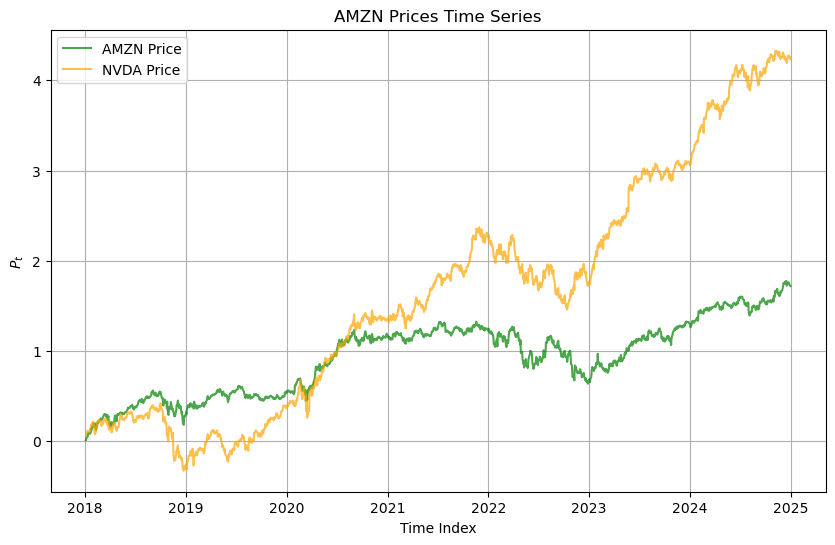

In [27]:
# Time Series Graphs for Cumulative Returns

plt.figure(figsize=(10, 6))
plt.plot(df_amzn['Close'].pct_change().cumsum(), label='AMZN Price', color='green', alpha=0.7)
plt.plot(df_nvda['Close'].pct_change().cumsum(), label='NVDA Price', color='orange', alpha=0.7)

# Config
plt.title('AMZN Prices Time Series')
plt.xlabel('Time Index')
plt.ylabel('$P_t$')
plt.legend()

# Show
plt.grid(True)
plt.show()


Nevertheless, prices do matter, especially if you are creating a naive investment strategy. For example, let us assume Nancy has 100 dollars available for purchasing in 2018. How many Amazon shares and how many Nvidia shares can she purchase with that money? And after that, how much money will she generate after she sells her stocks in 2024?

In [16]:
# Let us get the prices of each stock at t=0
amzn_first_p = df_amzn['Close'].iloc[0]
nvda_first_p = df_nvda['Close'].iloc[0]

print(f'AMZN price in t=0: {amzn_first_p}')
print(f'NVDA price in t=0: {nvda_first_p}')

AMZN price in t=0: 59.45050048828125
NVDA price in t=0: 4.929428577423096


In [17]:
# Now, let us calculate how much stocks can Nancy purchase in t = 0
amzn_purchased_stocks = 100 // amzn_first_p    # We use "//" for integer division
nvda_purchased_stocks = 100 // nvda_first_p

print(f'AMZN purchased stocks: {amzn_purchased_stocks}')
print(f'NVDA purchased stocks: {nvda_purchased_stocks}')

AMZN purchased stocks: 1.0
NVDA purchased stocks: 20.0


Thomas recommends Nancy to invest the leftover money in Treasury bonds, assuming a constant annual yield of 4%.

In [18]:
# Calculate the leftover money
amzn_leftover = 100 - (amzn_purchased_stocks * amzn_first_p)
nvda_leftover = 100 - (nvda_purchased_stocks * nvda_first_p)

print(f'AMZN leftover: {amzn_leftover}')
print(f'NVDA leftover: {nvda_leftover}')

AMZN leftover: 40.54949951171875
NVDA leftover: 1.411428451538086


Now we can calculate the returns generated by Nancy from January 1st, 2018, to December 31st, 2024. Then, we will sum the returns generated by the stocks in each case and the interest generated by the bonds.

In [20]:
# Calculate the Last Prices of Each stock
amzn_last_p = df_amzn['Close'].iloc[-1]
nvda_last_p = df_nvda['Close'].iloc[-1]

print(f'AMZN last price: {amzn_last_p}')
print(f'NVDA last price: {nvda_last_p}')

AMZN last price: 219.38999938964844
NVDA last price: 134.27764892578125


In [21]:
# Now calculate the amount of money generated during the period
amzn_monetary_returns = (amzn_last_p - amzn_first_p) * amzn_purchased_stocks
amzn_leftover_interests = amzn_leftover * (1.04)**(6)   # Six years

# Sum
first_investment_returns = amzn_monetary_returns + amzn_leftover_interests

print(f'AMZN monetary returns: {amzn_monetary_returns}')
print(f'Interests Generated by Left Over: {amzn_leftover_interests}')
print(f'Strategy Returns: {first_investment_returns}')

AMZN monetary returns: 159.9394989013672
Interests Generated by Left Over: 51.30805292267201
Strategy Returns: 211.2475518240392


In [22]:
# Now for Nvidia
nvda_monetary_returns = (nvda_last_p - nvda_first_p) * nvda_purchased_stocks
nvda_leftover_interests = nvda_leftover * (1.04)**(6)

# Sum
second_investment_returns = nvda_monetary_returns + nvda_leftover_interests

print(f'NVDA monetary returns: {nvda_monetary_returns}')
print(f'Interest Generated by Left Over: {nvda_leftover_interests}')
print(f'Strategy Returns: {second_investment_returns}')

NVDA monetary returns: 2586.964406967163
Interest Generated by Left Over: 1.7859072629775006
Strategy Returns: 2588.7503142301407


In [24]:
# Calculate the rate of returns
first_case_returns_rate = (first_investment_returns / 100) - 1
second_case_returns_rate = (second_investment_returns / 100) - 1

print(f'If Nancy would have pick AMZN: {first_case_returns_rate*100}%')
print(f'If Nancy would have pick NVDA: {second_case_returns_rate*100}%')

If Nancy would have pick AMZN: 111.24755182403918%
If Nancy would have pick NVDA: 2488.7503142301407%


In the universe where Nancy purchased NVDA, she is now having a great graduation trip in a tropical paradise.

### Logarithmic Returns vs Arithmetic Returns ###

It is a common dichotomy in the study of finance to choose between arithmetic returns and logarithmic returns. Even though the first may be more intuitive for people, the latter grant us a lot of favorable properties that enhance our financial models.

Arithmetic Returns:
\begin{aligned}
$ R_t = \frac{P_{t} - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$
\end{aligned}

Logarithmic Returns: 
\begin{aligned}
$r_t = \ln{\left(\frac{P_t}{P_{t-1}}\right)} = \ln{P_t} - \ln{P_{t-1}}$
\end{aligned}

In [77]:
# Let us calculate the returns and log returns
df_nvda['Returns'] = df_nvda['Close'].pct_change(1)
df_amzn['Returns'] = df_amzn['Close'].pct_change(1)

# Log Returns
df_nvda['Log_Returns'] = np.log(df_nvda['Close'] / df_nvda['Close'].shift(1))
df_amzn['Log_Returns'] = np.log(df_amzn['Close'] / df_amzn['Close'].shift(1))

Mathematically, it is proven that logarithmic returns will always be lower than arithmetic returns if $(1 + R_t) > 0$.

However, logarithmic returns possess other characteristics that are beneficial for us:
- Additive
- Symmetric

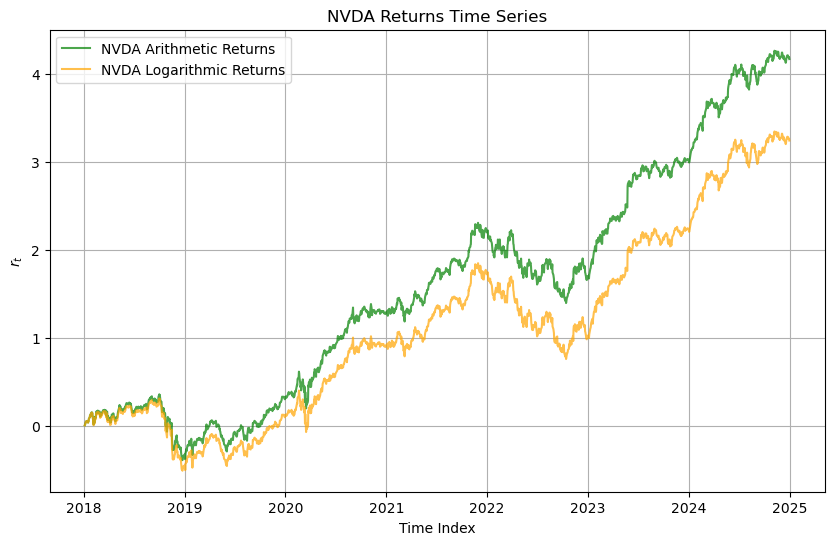

In [78]:
# Time Series Graphs for Cumulative Simple Returns and Log

plt.figure(figsize=(10, 6))
plt.plot(df_nvda['Returns'].cumsum(), label='NVDA Arithmetic Returns', color='green', alpha=0.7)
plt.plot(df_nvda['Log_Returns'].cumsum(), label='NVDA Logarithmic Returns', color='orange', alpha=0.7)

# Config
plt.title('NVDA Returns Time Series')
plt.xlabel('Time Index')
plt.ylabel('$r_t$')
plt.legend()

# Show
plt.grid(True)
plt.show()

In the following plot you can note that the range for the Arithmetic Returns is larger than the range for the Logarithmic Returns

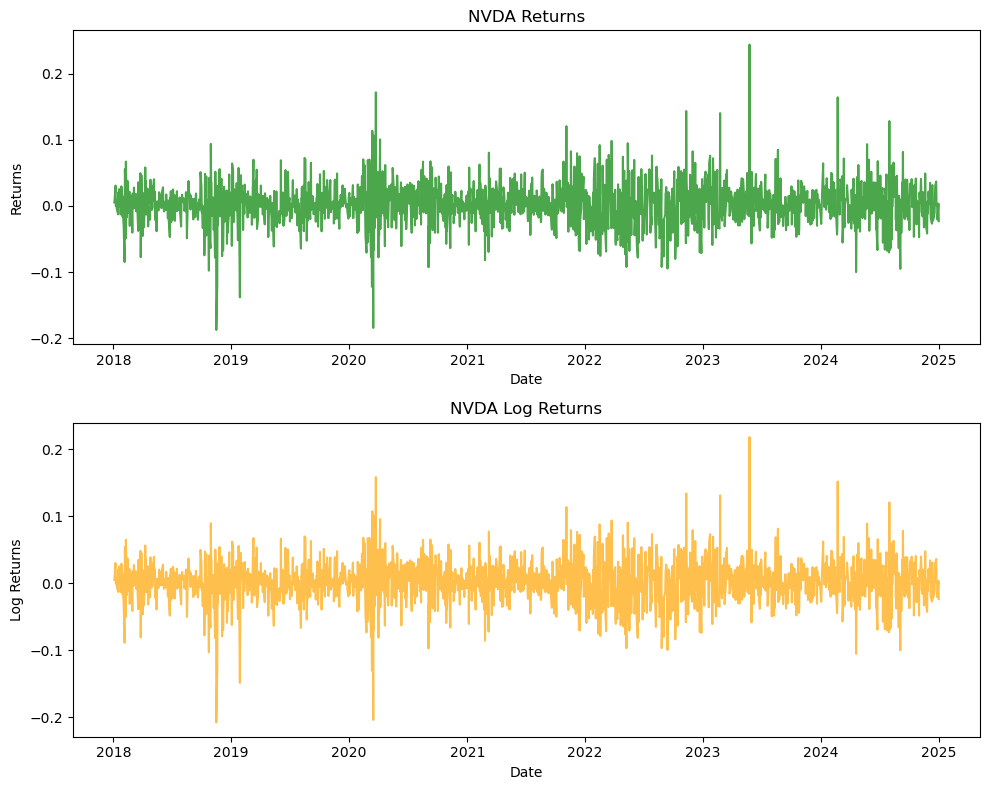

In [79]:
# Time Series Graphs

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(df_nvda['Returns'], color='green', alpha=0.7)
axes[0].set_title('NVDA Returns')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Returns')

axes[1].plot(df_nvda['Log_Returns'], color='orange', alpha=0.7)
axes[1].set_title('NVDA Log Returns')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Log Returns')

plt.tight_layout()

plt.show()

In [87]:
# Let us check the mean returns

# AMZN
amzn_mean_rets = df_amzn['Log_Returns'].mean()
amzn_annualized_mean_rets = amzn_mean_rets * 252

# NVDA
nvda_mean_rets = df_nvda['Log_Returns'].mean()
nvda_annualized_mean_rets = nvda_mean_rets * 252

print(f'AMZN Mean Daily Returns: {(amzn_mean_rets * 100).round(2)}%')
print(f'AMZN Mean Annual Returns: {(amzn_annualized_mean_rets * 100).round(2)}%')
print(f'NVDA Mean Daily Returns: {(nvda_mean_rets * 100).round(2)}%')
print(f'NVDA Mean Annual Returns: {(nvda_annualized_mean_rets * 100).round(2)}%')

AMZN Mean Daily Returns: 0.07%
AMZN Mean Annual Returns: 18.7%
NVDA Mean Daily Returns: 0.18%
NVDA Mean Annual Returns: 46.43%


In [82]:
# And the Standard Deviations

# AMZN
amzn_std_rets = df_amzn['Log_Returns'].std()
amzn_annualized_std_rets = amzn_std_rets * np.sqrt(252)

# NVDA
nvda_std_rets = df_nvda['Log_Returns'].std()
nvda_annualized_std_rets = nvda_std_rets * np.sqrt(252)

print(f'AMZN Returns Daily Standard Deviation: {round(amzn_std_rets*100, 2)}%')
print(f'AMZN Returns Annualized Standard Deviation: {round(amzn_annualized_std_rets*100, 2)}%')
print(f'NVDA Returns Daily Standard Deviation: {round(nvda_std_rets*100, 2)}%')
print(f'NVDA Returns Annualized Standard Deviation: {round(nvda_annualized_std_rets*100, 2)}%')

AMZN Returns Daily Standard Deviation: 2.17%
AMZN Returns Annualized Standard Deviation: 34.42%
NVDA Returns Daily Standard Deviation: 3.24%
NVDA Returns Annualized Standard Deviation: 51.42%


In [90]:
# Cumulative Returns

# Arithmetic cumulative returns
c_arithmetic_rets = (1 + df_nvda['Returns']).cumprod() - 1
c_arithmetic_rets = c_arithmetic_rets

# Logarithmic cumulative returns
c_logarithmic_rets = df_nvda['Log_Returns'].cumsum()

# Print final cumulative returns (rounded to 2 decimals)
print(f'NVDA Cumulative Arithmetic Returns: {(c_arithmetic_rets.iloc[-1] * 100):.2f}%')
print(f'NVDA Cumulative Logarithmic Returns: {(c_logarithmic_rets.iloc[-1] * 100):.2f}%')

NVDA Cumulative Arithmetic Returns: 2455.79%
NVDA Cumulative Logarithmic Returns: 324.09%


In [108]:
# The Compound Annual Growth Rate 
initial_vals = df_nvda['Close'].iloc[0]
final_vals = df_nvda['Close'].iloc[-1]

n = 6 # Six Years

# Calculate the CAGR
CAGR = np.power(final_vals / initial_vals, (1 / (n))) - 1

print(f"The Compound Annual Growth Rate is: {(CAGR*100).round(2)}%")

The Compound Annual Growth Rate is: 71.63%


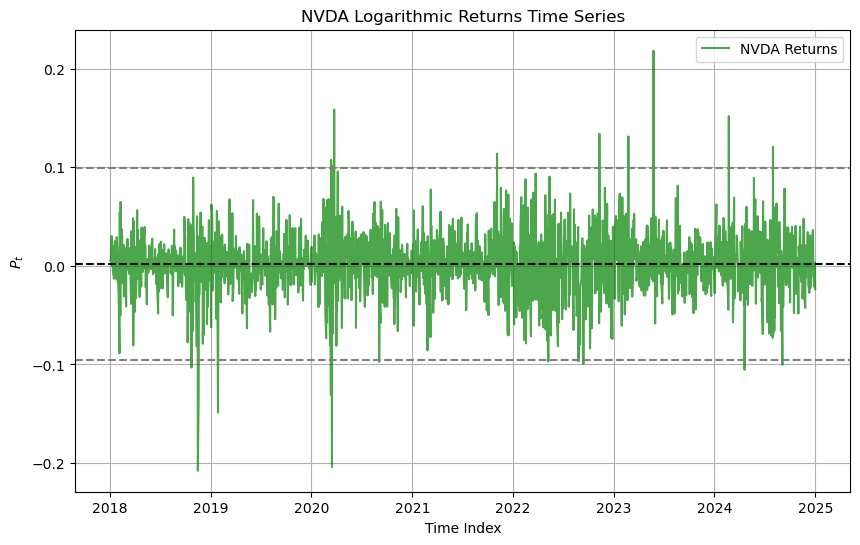

In [92]:
# Time Series Graphs to check Standard Deviation

upper_lim = df_nvda['Log_Returns'].mean() + 3*df_nvda['Log_Returns'].std()
lower_lim = df_nvda['Log_Returns'].mean() - 3*df_nvda['Log_Returns'].std()

plt.figure(figsize=(10, 6))
plt.plot(df_nvda['Log_Returns'], label='NVDA Returns', color='green', alpha=0.7)
plt.axhline(y=df_nvda['Log_Returns'].mean(), color='black', linestyle='dashed')
plt.axhline(y=upper_lim, color='grey', linestyle='dashed')
plt.axhline(y=lower_lim, color='grey', linestyle='dashed')

# Config
plt.title('NVDA Logarithmic Returns Time Series')
plt.xlabel('Time Index')
plt.ylabel('$P_t$')
plt.legend()

# Show
plt.grid(True)
plt.show()

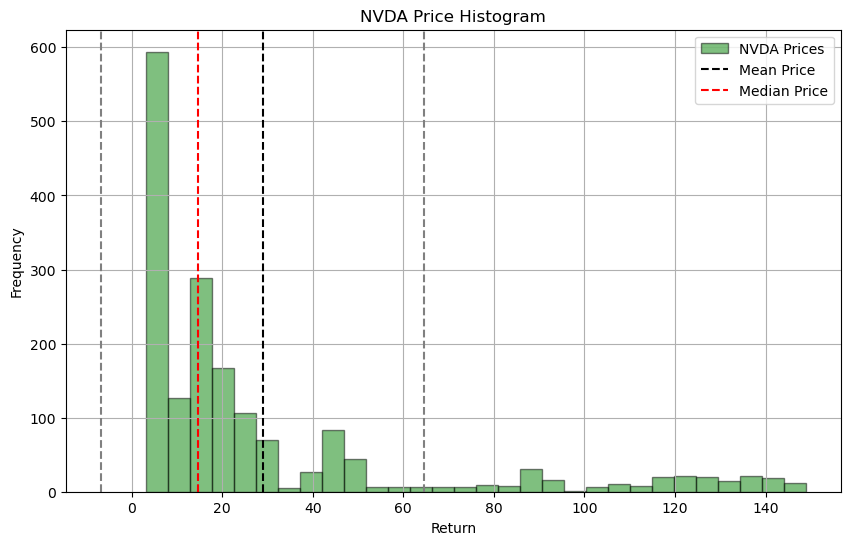

In [93]:
# Create a Histogram of Prices

upper_lim_p = df_nvda['Close'].mean() + df_nvda['Close'].std()
lower_lim_p = df_nvda['Close'].mean() - df_nvda['Close'].std()

plt.figure(figsize=(10, 6))
plt.hist(df_nvda['Close'], bins=30, color='green', alpha=0.5, edgecolor='black', label='NVDA Prices')

# Mean and Standard Deviation
plt.axvline(x=df_nvda['Close'].mean(), color='black', linestyle='dashed', label='Mean Price')
plt.axvline(x=df_nvda['Close'].median(), color='red', linestyle='dashed', label='Median Price')
plt.axvline(x=upper_lim_p, color='grey', linestyle='dashed')
plt.axvline(x=lower_lim_p, color='grey', linestyle='dashed')

# Config
plt.title('NVDA Price Histogram')
plt.xlabel('Return')
plt.ylabel('Frequency')

# Legend and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

In [94]:
# Let us count how much observations we find inside one std
stds = 1

upper_lim_p = df_nvda['Close'].mean() + stds*df_nvda['Close'].std()
lower_lim_p = df_nvda['Close'].mean() - stds*df_nvda['Close'].std()

inside_one_std = df_nvda[(df_nvda['Close'] >= lower_lim_p) & (df_nvda['Close'] <= upper_lim_p)]

percentage = (len(inside_one_std)/len(df_amzn))*100

print(percentage)

86.88245315161839


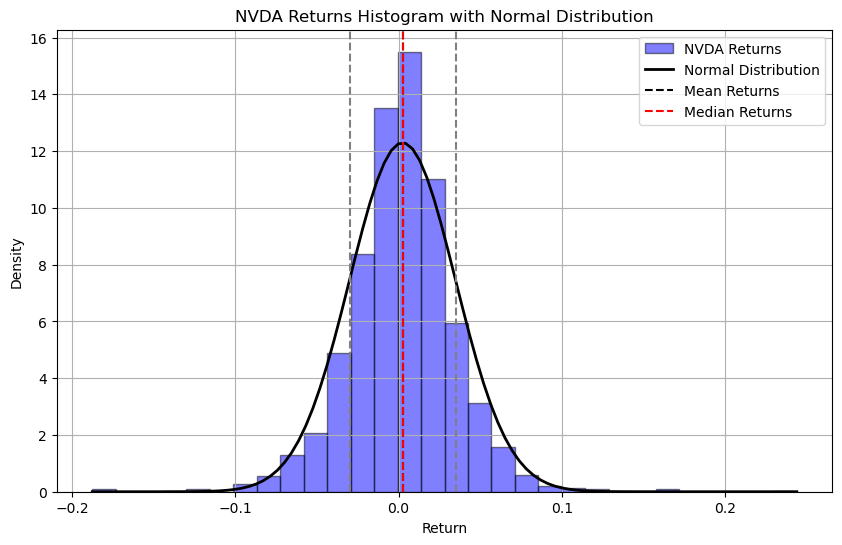

In [95]:
# Calculate Mean and Standard Deviation
mu = df_nvda['Returns'].mean()
sigma = df_nvda['Returns'].std()

# Create Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_nvda['Returns'], bins=30, density=True, color='blue', alpha=0.5, edgecolor='black', label='NVDA Returns')

# Generate the Values of the Normal Distribution
x = np.linspace(df_nvda['Returns'].min(), df_nvda['Returns'].max(), 100)
y = norm.pdf(x, mu, sigma)

# Graph the Real Normal Distribution
plt.plot(x, y, color='black', linestyle='solid', linewidth=2, label='Normal Distribution')

# Reference Lines
plt.axvline(x=mu, color='black', linestyle='dashed', label='Mean Returns')
plt.axvline(x=df_nvda['Returns'].median(), color='red', linestyle='dashed', label='Median Returns')
plt.axvline(x=mu + sigma, color='grey', linestyle='dashed')
plt.axvline(x=mu - sigma, color='grey', linestyle='dashed')

# Config
plt.title('NVDA Returns Histogram with Normal Distribution')
plt.xlabel('Return')
plt.ylabel('Density')

# Legends and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

In [96]:
# Let us count how much observations we find inside one std
stds = 1

upper_lim = df_nvda['Returns'].mean() + stds*df_nvda['Returns'].std()
lower_lim = df_nvda['Returns'].mean() - stds*df_nvda['Returns'].std()

inside_one_std = df_nvda[(df_nvda['Returns'] >= lower_lim) & (df_nvda['Returns'] <= upper_lim)]

percentage = (len(inside_one_std)/len(df_amzn))*100

print(percentage)

73.99204997160705


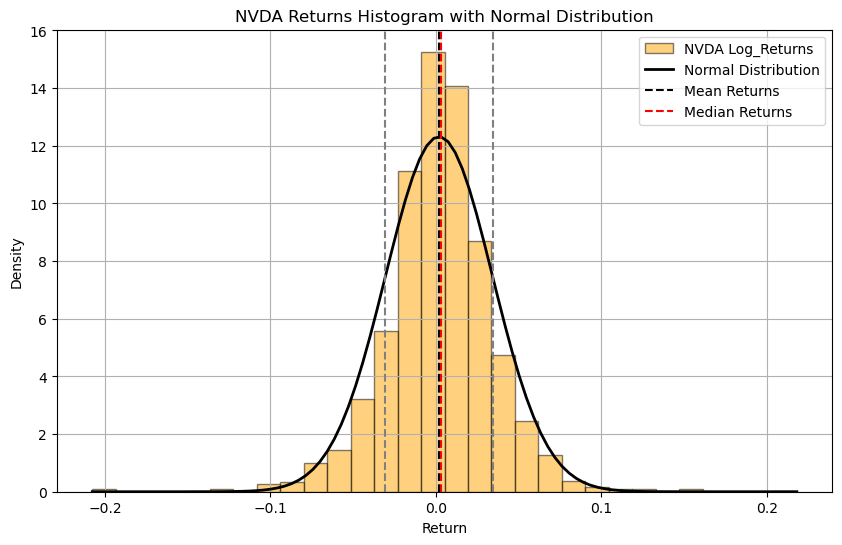

In [97]:
# Calculate Mean and Standard Deviation
mu = df_nvda['Log_Returns'].mean()
sigma = df_nvda['Log_Returns'].std()

# Create Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_nvda['Log_Returns'], bins=30, density=True, color='orange', alpha=0.5, edgecolor='black', label='NVDA Log_Returns')

# Generate the Values of the Normal Distribution
x = np.linspace(df_nvda['Log_Returns'].min(), df_nvda['Log_Returns'].max(), 100)
y = norm.pdf(x, mu, sigma)

# Graph the Real Normal Distribution
plt.plot(x, y, color='black', linestyle='solid', linewidth=2, label='Normal Distribution')

# Reference Lines
plt.axvline(x=mu, color='black', linestyle='dashed', label='Mean Returns')
plt.axvline(x=df_nvda['Log_Returns'].median(), color='red', linestyle='dashed', label='Median Returns')
plt.axvline(x=mu + sigma, color='grey', linestyle='dashed')
plt.axvline(x=mu - sigma, color='grey', linestyle='dashed')

# Config
plt.title('NVDA Returns Histogram with Normal Distribution')
plt.xlabel('Return')
plt.ylabel('Density')

# Legends and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

In [98]:
# Let us count how much observations we find inside one std
stds = 1

upper_lim = df_nvda['Log_Returns'].mean() + stds*df_nvda['Log_Returns'].std()
lower_lim = df_nvda['Log_Returns'].mean() - stds*df_nvda['Log_Returns'].std()

inside_one_std = df_nvda[(df_nvda['Log_Returns'] >= lower_lim) & (df_nvda['Log_Returns'] <= upper_lim)]

percentage = (len(inside_one_std)/len(df_amzn))*100

print(percentage)

73.99204997160705


In [99]:
# Calculate Skewness
skewness = skew(df_nvda['Log_Returns'].dropna())

# Calculate Kurtosis
kurt = kurtosis(df_nvda['Log_Returns'].dropna())

print(f"Mean: {df_nvda['Log_Returns'].dropna().mean()}")
print(f"Variance: {df_nvda['Log_Returns'].dropna().var()}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Mean: 0.0018424945882160935
Variance: 0.0010490326089559266
Skewness: -0.1476990771044378
Kurtosis: 4.342545945778626


In [100]:
# Normality Test

jb_stat, p_value = jarque_bera(df_nvda['Log_Returns'].dropna())

print(f"Jarque-Bera Stat: {jb_stat}")
print(f"p-value: {p_value}")

Jarque-Bera Stat: 1388.508086228586
p-value: 3.0853187356856156e-302


In [101]:
# Calculate the JB Stat

n = len(df_nvda['Log_Returns'].dropna())
S = skew(df_nvda['Log_Returns'].dropna())
K = kurtosis(df_nvda['Log_Returns'].dropna(), fisher=False) 

JB_stat = (n / 6) * (S**2 + ((K - 3)**2 / 4))

# Calculate p-value
p_value = 1 - chi2.cdf(JB_stat, df=2)

print(f"JB Stat: {JB_stat}")
print(f"p-value: {p_value}")

JB Stat: 1388.508086228586
p-value: 0.0


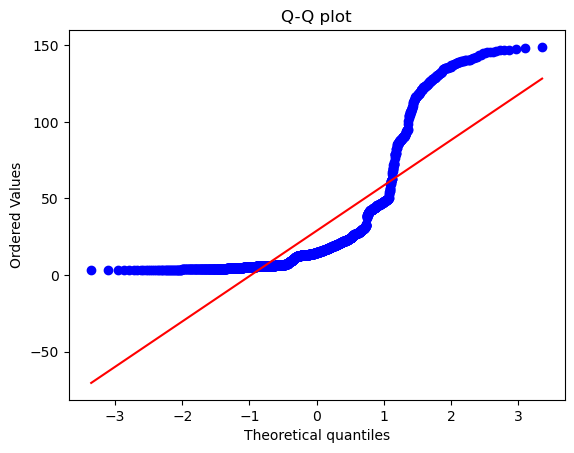

In [102]:
# Prices QQ Plot

probplot(df_nvda['Close'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

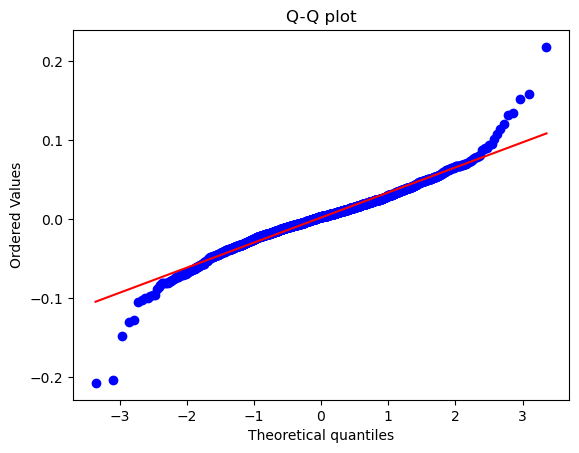

In [103]:
# Returns QQ Plot

probplot(df_nvda['Log_Returns'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

In [104]:
# Anderson Test

result = anderson(df_nvda['Log_Returns'].dropna())

print(f"Anderson-Darling Stat: {result.statistic}")
print(f"Critical Values: {result.critical_values}")
print(f"Significance Level: {result.significance_level}")

Anderson-Darling Stat: 9.864861483953291
Critical Values: [0.575 0.655 0.785 0.916 1.09 ]
Significance Level: [15.  10.   5.   2.5  1. ]
